### Import the Necessary Libraries :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('C:/Users/MARVINRAJ/Documents/Sem 5/TDM2151/Projet/heart_failure.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.00,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.00,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.00,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.00,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.00,1,160,1,20,0,327000.00,2.70,116,0,0,8,1


### Data Info :

In [5]:
data.shape

(299, 13)

In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


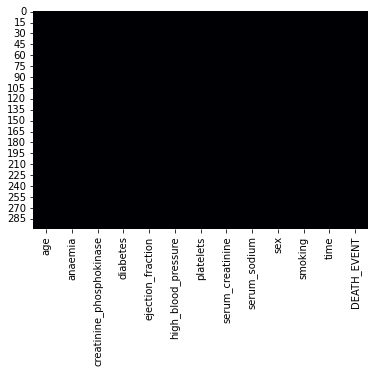

In [8]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

- **No null values** present in the data!

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.00,60.83,11.89,40.00,51.00,60.00,70.00,95.00
anaemia,299.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
creatinine_phosphokinase,299.00,581.84,970.29,23.00,116.50,250.00,582.00,7861.00
diabetes,299.00,0.42,0.49,0.00,0.00,0.00,1.00,1.00
ejection_fraction,299.00,38.08,11.83,14.00,30.00,38.00,45.00,80.00
high_blood_pressure,299.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00
platelets,299.00,263358.03,97804.24,25100.00,212500.00,262000.00,303500.00,850000.00
serum_creatinine,299.00,1.39,1.03,0.50,0.90,1.10,1.40,9.40
serum_sodium,299.00,136.63,4.41,113.00,134.00,137.00,140.00,148.00
sex,299.00,0.65,0.48,0.00,0.00,1.00,1.00,1.00


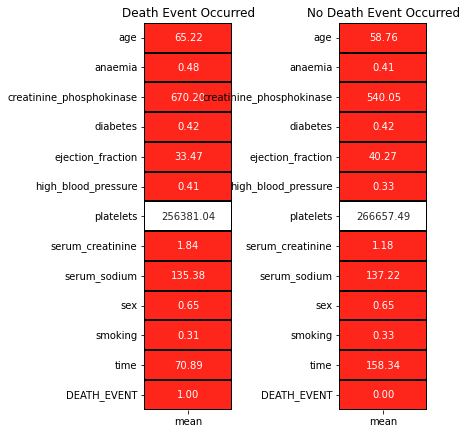

In [10]:
yes = data[data['DEATH_EVENT'] == 1].describe().T
no = data[data['DEATH_EVENT'] == 0].describe().T

colors = ['#FE251B','#FFFFFF']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5),)
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Death Event Occurred');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Death Event Occurred');

fig.tight_layout(pad = -3)

- **Mean** values of all the features for cases of **DEATH_EVENT** and **No DEATH_EVENT**.

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Exploratory Data Analysis</div></center>

### Dividing features into Numerical and Categorical :

In [11]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


- Here, categorical features are defined if the the attribute has less than 6 unique elements else it is a numerical feature.
- Typical approach for this division of features can also be based on the datatypes of the elements of the respective attribute.

In [12]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)
df1 = data.copy(deep = True)

- Converting the datatypes of **age** and **platelets** features from float to integer.
- Creating a deep copy of the orginal dataset for experimenting with data, visualization and modeling.
- Modifications in the original dataset will not be highlighted in this deep copy.

### Categorical Features :

#### Distribution of Categorical Features :

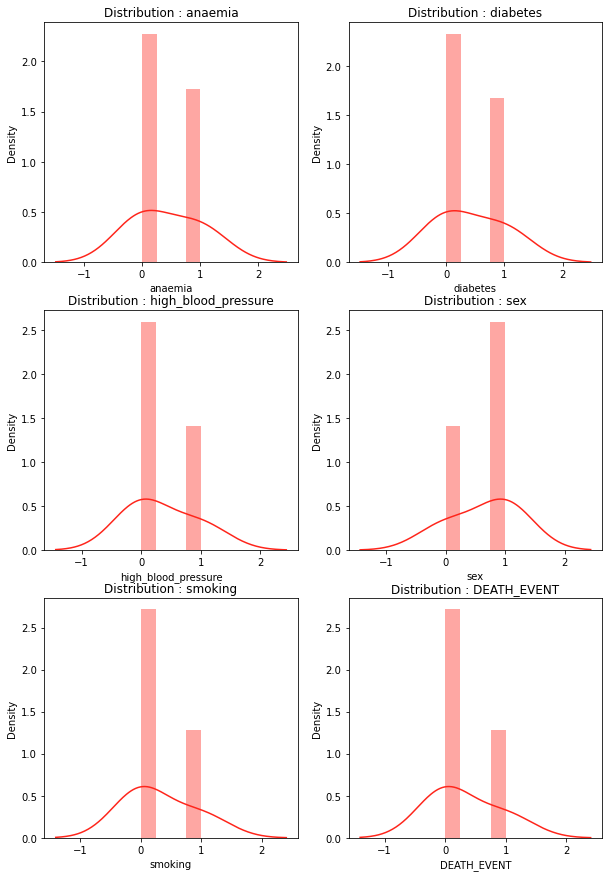

In [13]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features)):
    
    plt.subplot(3,2,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)

- All the categorical features are **Normally Distributed**.

### Numerical Features :

#### Distribution of Numerical Features :

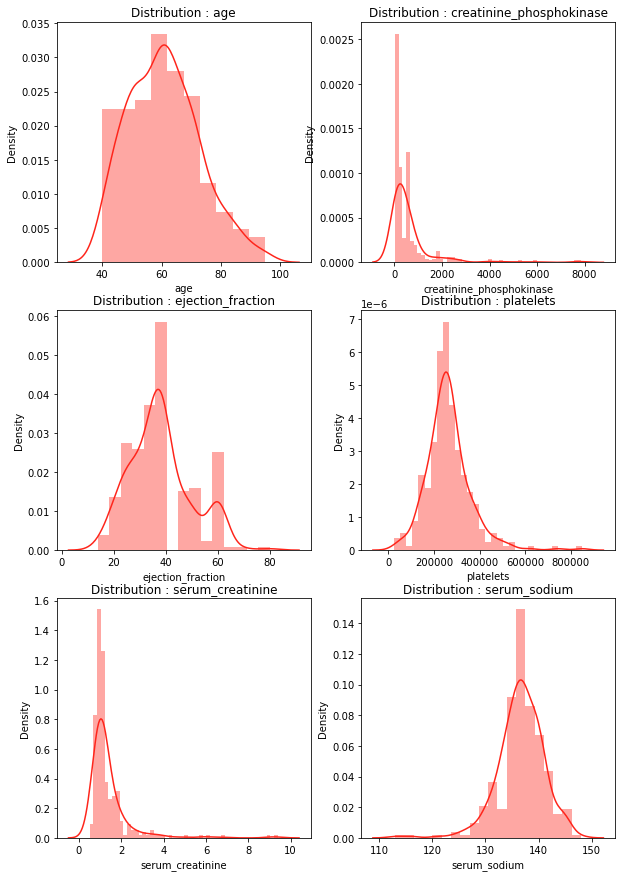

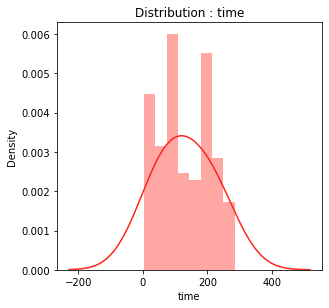

In [14]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(numerical_features) - 1):
    plt.subplot(3,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

- **Age**,**Creatinine_Phosphokinase**,**Ejaction_Fraction** and **Serum_creatinine** have a **rightly** or **positively skewed** data distribution.
- **Platelets** and **Serum_Sodium** are near about **normally distributed**.
- **Time's** data distribution is similar to a typical **Time Series Analysis** graph with irregularities present in it. 

### Target Variable Visualization (DEATH_EVENT) : 

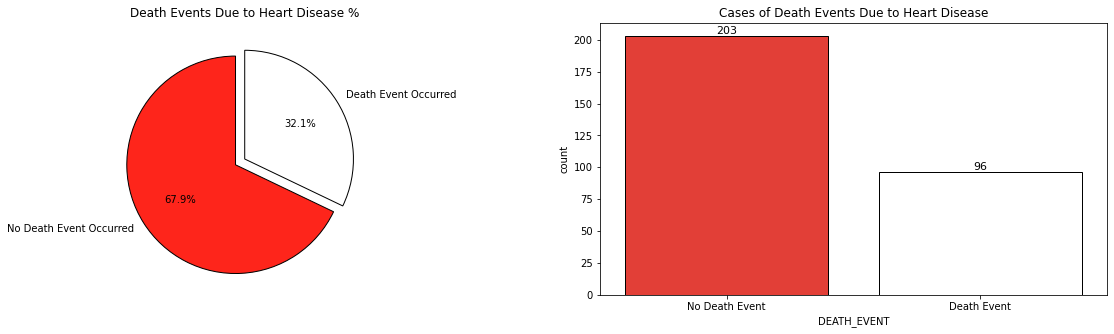

In [15]:
l = list(data['DEATH_EVENT'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Death Event Occurred','Death Event Occurred'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Death Events Due to Heart Disease %');

plt.subplot(1,2,2)
ax = sns.countplot('DEATH_EVENT',data = data, palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
plt.title('Cases of Death Events Due to Heart Disease');
plt.show()

- The dataset is **unbalanced** with very low data points (299)!
- **2 : 1** ratio for **No Death Event cases : Death Event cases!**
- Due to this, predictions will be biased towards **No Death Event** cases.
- Visualizations will also display this bias, thus making it difficult to gain insight.

### Categorical Features vs Target Variable (DEATH_EVENT) :

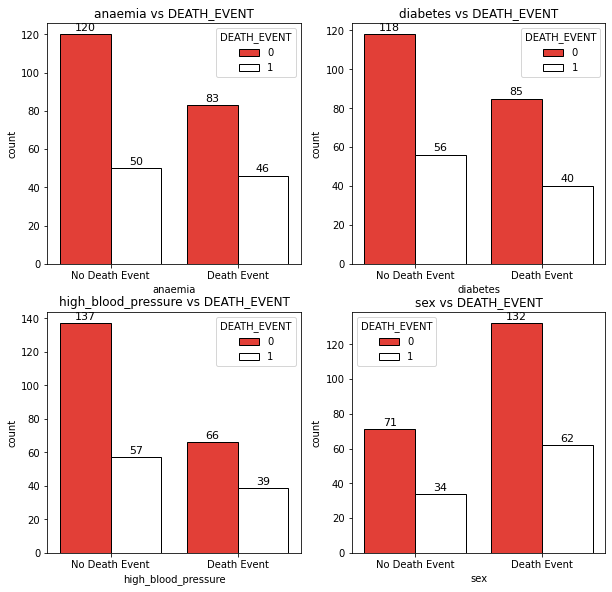

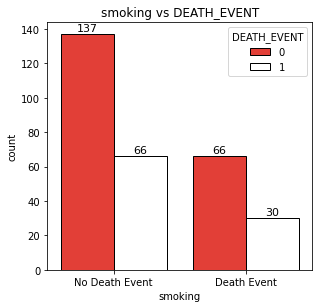

In [16]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(categorical_features) - 2):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(categorical_features[i],data = data,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    ax.set_xticklabels(['No Death Event','Death Event'])
    title = categorical_features[i] + ' vs DEATH_EVENT'
    plt.title(title);
    
plt.figure(figsize = (4.75,4.55))
ax = sns.countplot(categorical_features[-2],data = data,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Death Event','Death Event'])
title = categorical_features[-2] + ' vs DEATH_EVENT'
plt.title(title);

- All the graphs near about share the same pattern.
- According to the graphs, patients with negative cases of **anaemia**, **diabetes**, **high_blood_pressure** and **smoking**  leads to **DEATH_EVENT** more than the positive cases of these medical conditions.
- There are more cases cases of **male** population confronting a **DEATH_EVENT** due to heart failure than **female** population.

### Categorical Features vs Cases of DEATH_EVENT :

In [17]:
anaemia = data[data['DEATH_EVENT'] == 1]['anaemia'].value_counts()
anaemia = [anaemia[0] / sum(anaemia) * 100, anaemia[1] / sum(anaemia) * 100]

diabetes = data[data['DEATH_EVENT'] == 1]['diabetes'].value_counts()
diabetes = [diabetes[0] / sum(diabetes) * 100,diabetes[1] / sum(diabetes) * 100]

hbp = data[data['DEATH_EVENT'] == 1]['high_blood_pressure'].value_counts()
hbp = [hbp[0] / sum(hbp) * 100,hbp[1] / sum(hbp) * 100]

sex = data[data['DEATH_EVENT'] == 1]['sex'].value_counts()
sex = [sex[0] / sum(sex) * 100,sex[1] / sum(sex) * 100]

smoke = data[data['DEATH_EVENT'] == 1]['smoking'].value_counts()
smoke = [smoke[0] / sum(smoke) * 100,smoke[1] / sum(smoke) * 100]

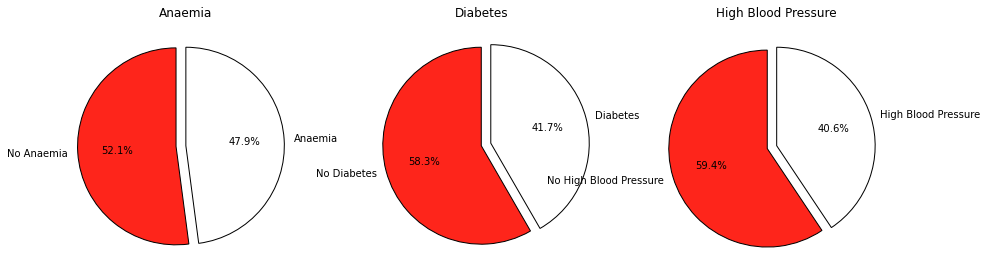

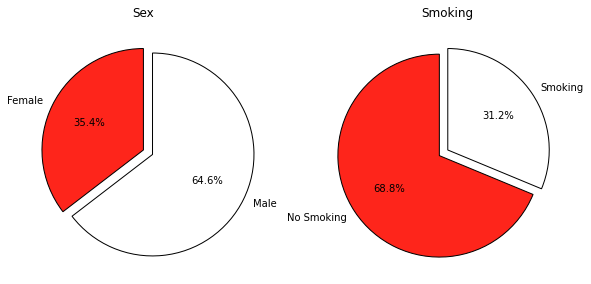

In [18]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,15))

plt.subplot(1,3,1)
plt.pie(anaemia,labels = ['No Anaemia','Anaemia'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Anaemia');

plt.subplot(1,3,2)
plt.pie(diabetes,labels = ['No Diabetes', 'Diabetes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Diabetes');

plt.subplot(1,3,3)
plt.pie(hbp,labels = ['No High Blood Pressure','High Blood Pressure'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('High Blood Pressure');

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
plt.pie(sex,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(1,2,2)
plt.pie(smoke,labels = ['No Smoking','Smoking'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Smoking');

- These piecharts support the case for more **DEATH_EVENT** due to negative cases of **anaemia**, **diabetes**, **high_blood_pressure** and **smoking** than their positive counterparts.
- Out of the total cases of heart failure leading to **DEATH_EVENT**, **males** are more prone to it than **females**. 

### Numerical Features vs Target Variable (DEATH_EVENT) :

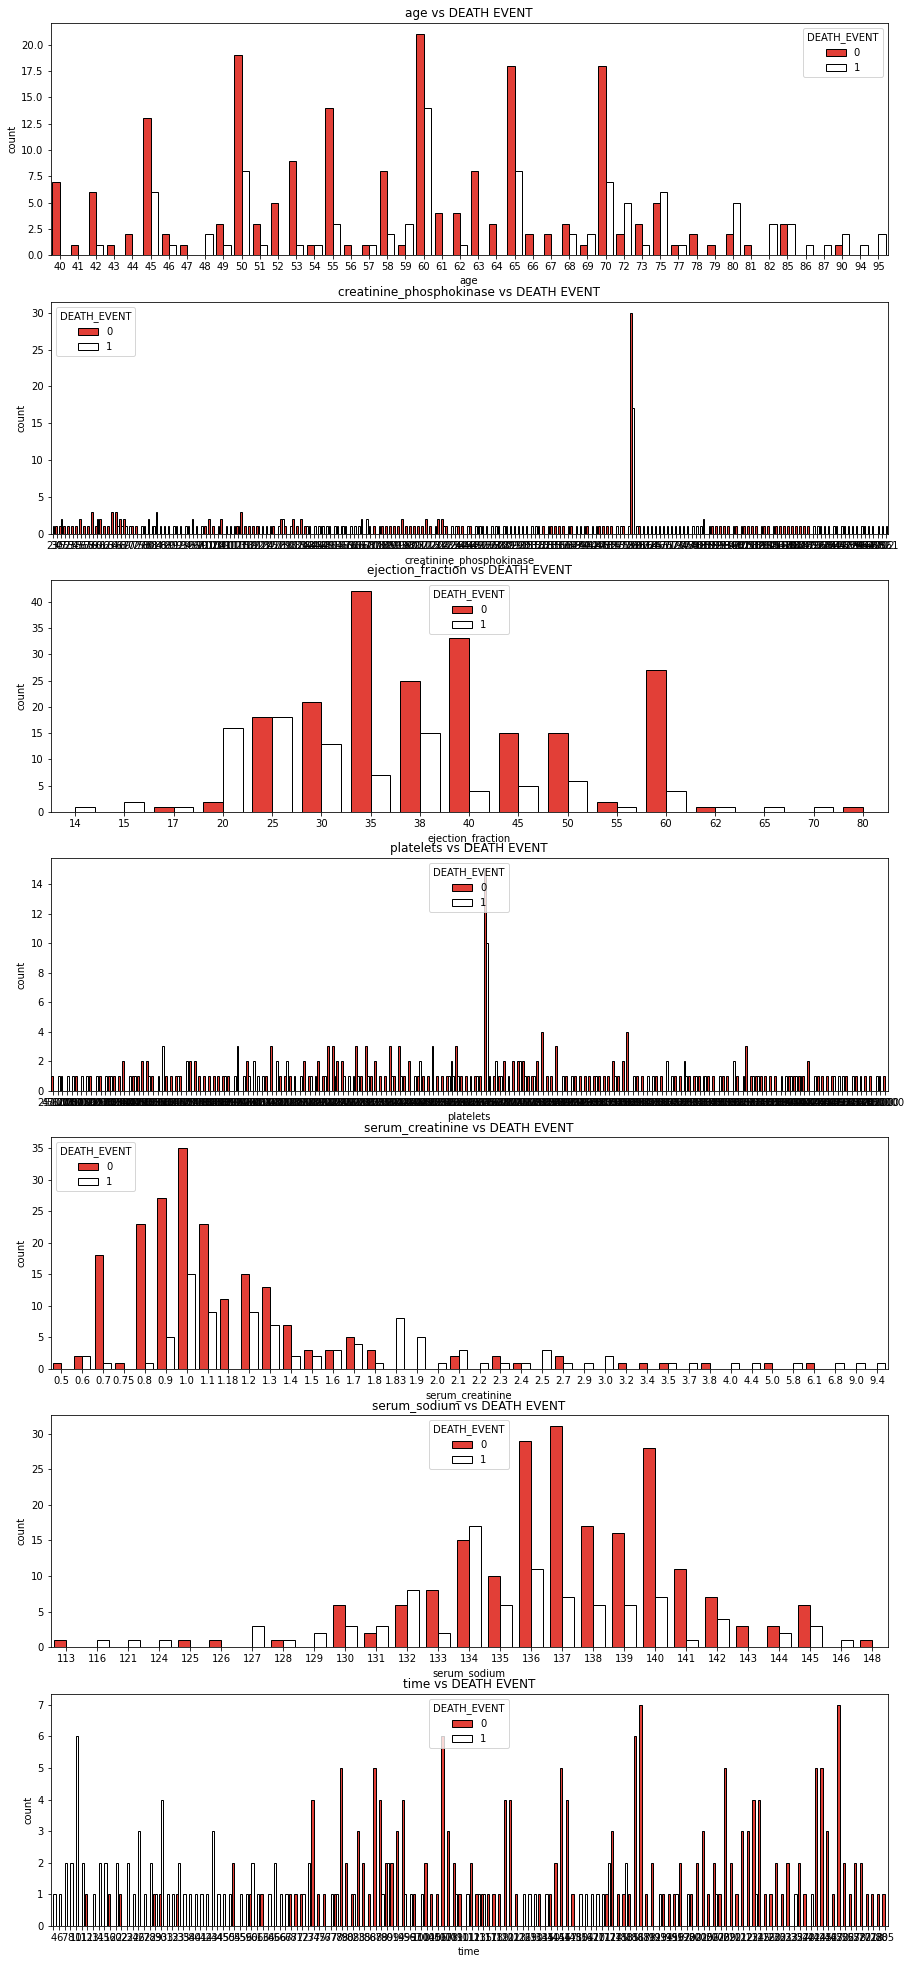

In [19]:
fig, ax = plt.subplots(nrows = 7,ncols = 1,figsize = (15,35),squeeze = False)
for i in range(len(numerical_features)):
    plt.subplot(7,1,i+1)
    sns.countplot(numerical_features[i],data = data,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    title = numerical_features[i] + ' vs DEATH EVENT'
    plt.title(title);

- Cases of **DEATH_EVENT** initiate from the age of **45**. Some specific peaks of high cases of **DEATH_EVENT** can be observed at 45, 50, 60, 65, 70, 75 and 80.
- High cases of **DEATH_EVENT** can be observed for **ejaction_fraction** values from **20 - 60**.
- **serum_creatinine** values from **0.6** to **3.0** have higher probability to lead to **DEATH_EVENT**.
- **serum_sodium** values **127 - 145** indicate towards a **DEATH_EVENT** due to heart failure.

In [20]:
data['creatinine_phosphokinase_Group'] = [ int(i / 100) for i in data['creatinine_phosphokinase']]
data['platelets_Group'] = [ int(i / 10**5) for i in data['platelets']]
data['time_Group'] = [ int(i / 5) for i in data['time']]

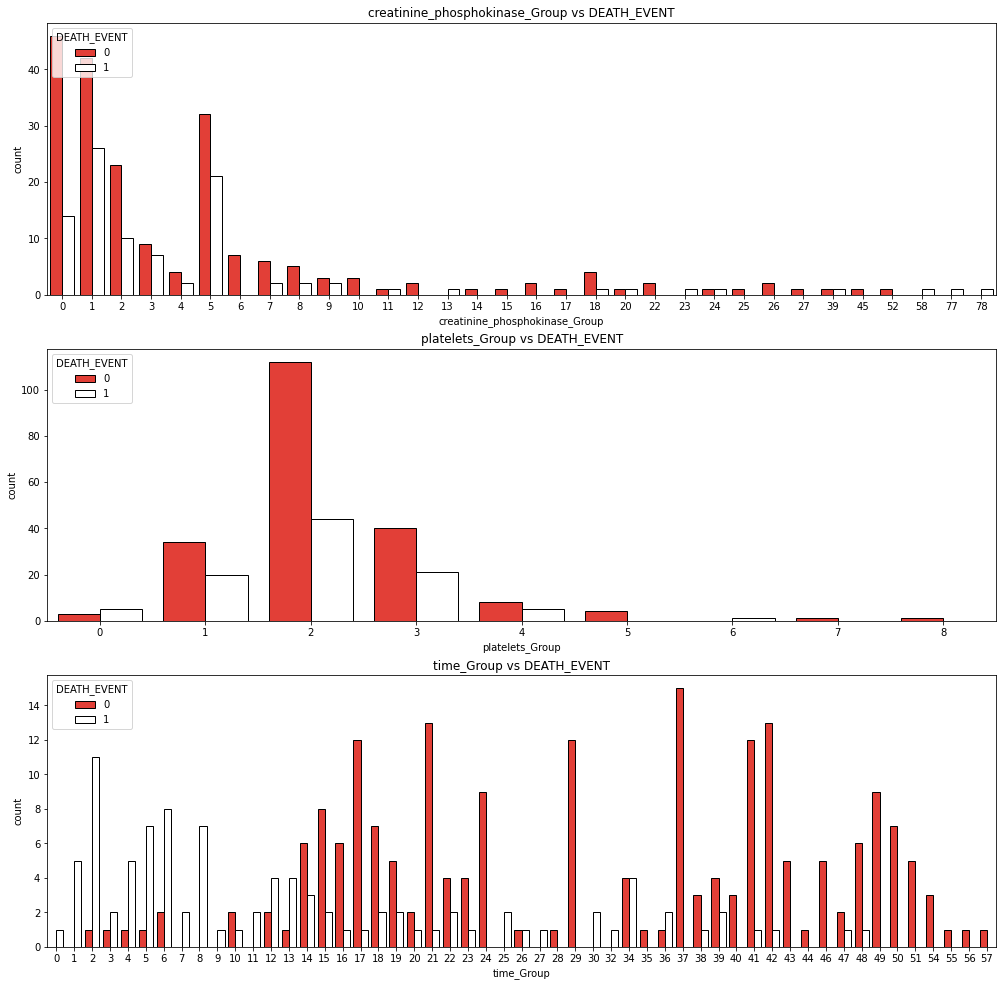

In [21]:
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (17,17))
group_numerical_features = [i + '_Group' for i in ['creatinine_phosphokinase','platelets','time']]

for i in range(len(group_numerical_features)):
    plt.subplot(3,1,i+1)
    sns.countplot(group_numerical_features[i],data = data,hue = "DEATH_EVENT",palette = colors,edgecolor = 'black')
    title = group_numerical_features[i] + ' vs DEATH_EVENT'
    plt.title(title);

### Categorical features vs Numerical features w.r.t Target variable(DEATH_EVENT) :

#### anaemia vs Numerical Features :

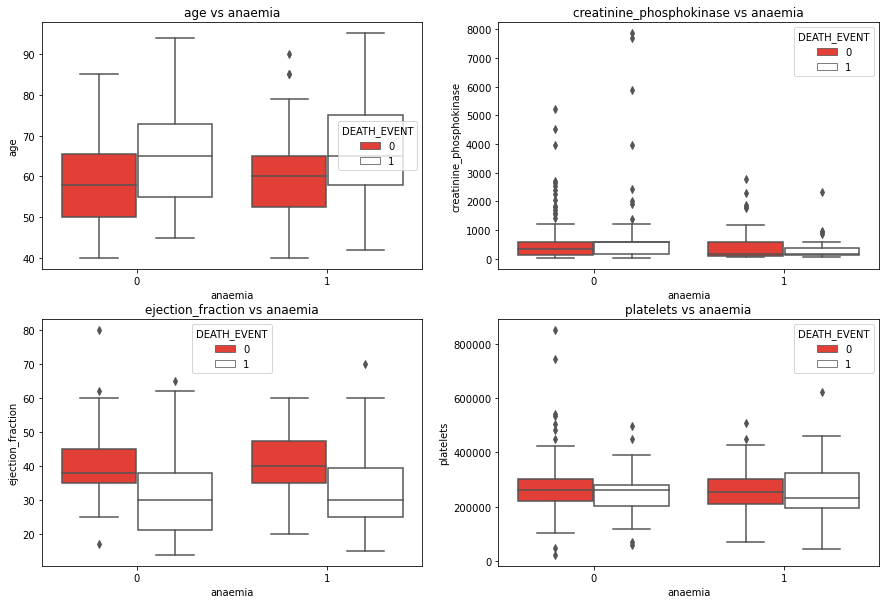

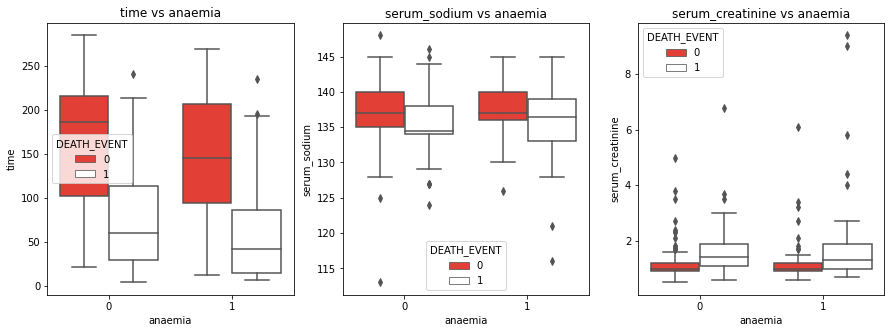

In [22]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'anaemia',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs anaemia' 
    plt.title(title);

fig = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'anaemia',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs anaemia' 
    plt.title(title);

#### diabetes vs Numerical Features :

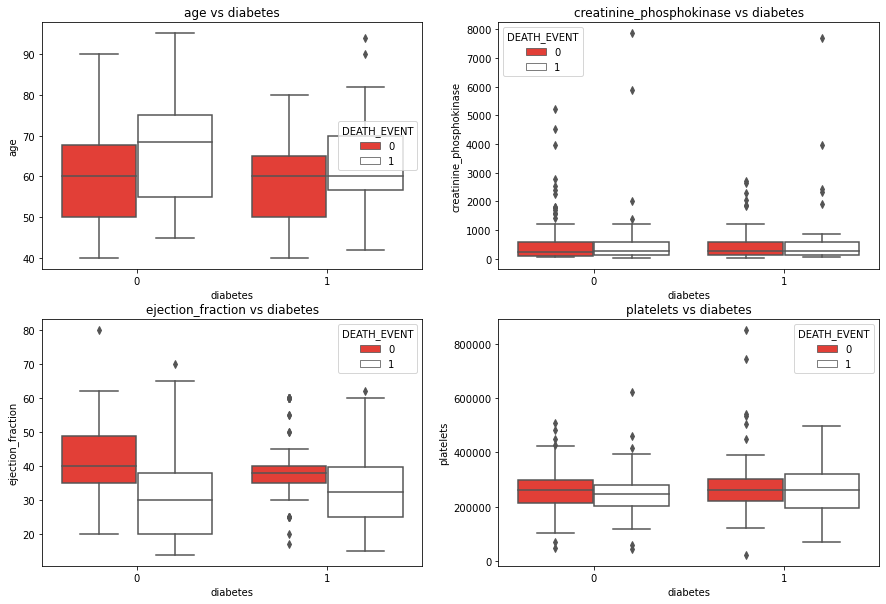

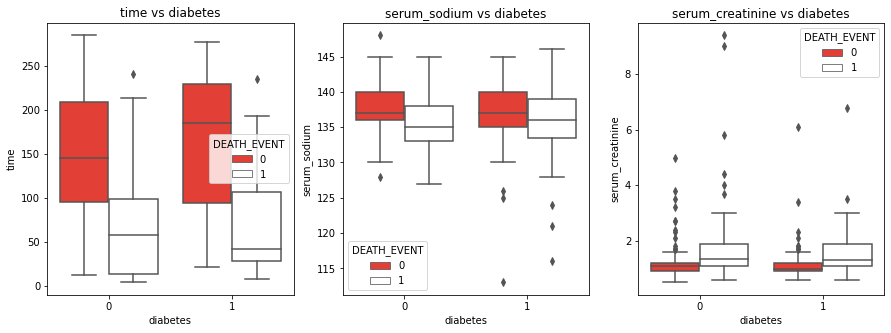

In [23]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'diabetes',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs diabetes' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'diabetes',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs diabetes' 
    plt.title(title);

#### high_blood_pressure vs Numerical features :

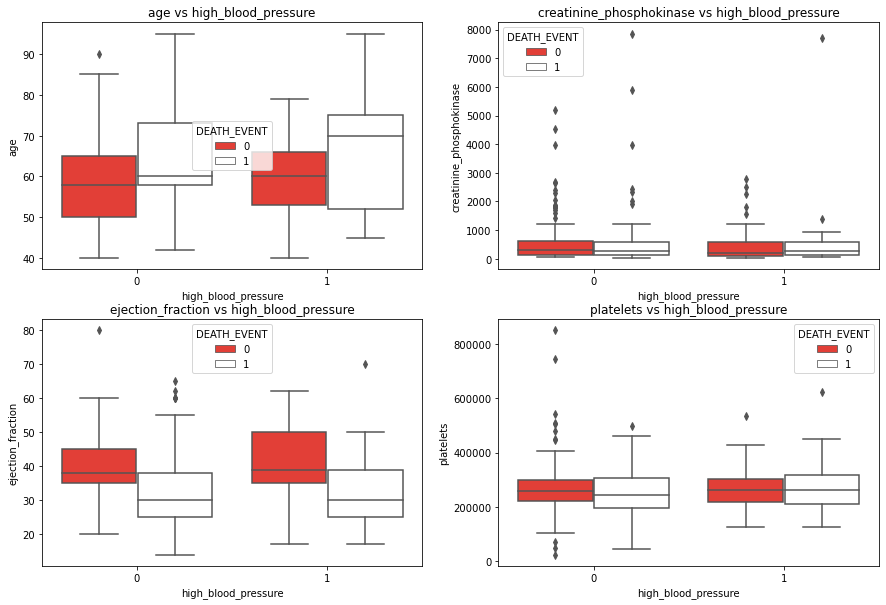

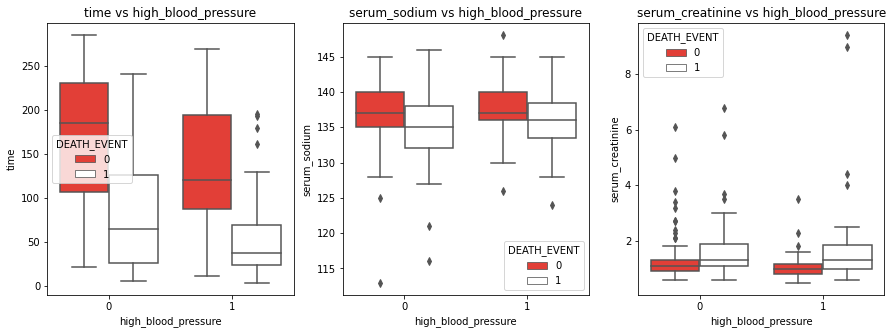

In [24]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'high_blood_pressure',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs high_blood_pressure' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'high_blood_pressure',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs high_blood_pressure' 
    plt.title(title);

#### sex vs Numerical Features :

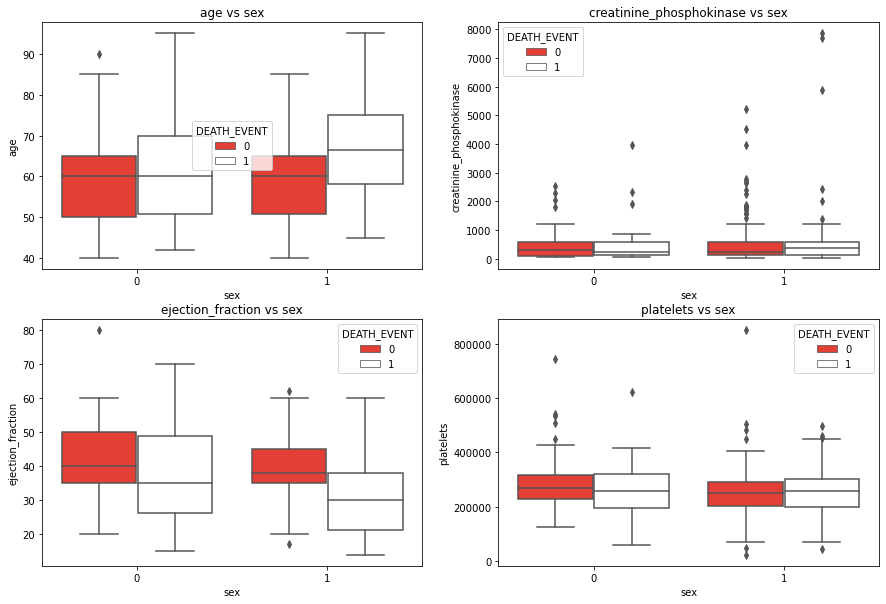

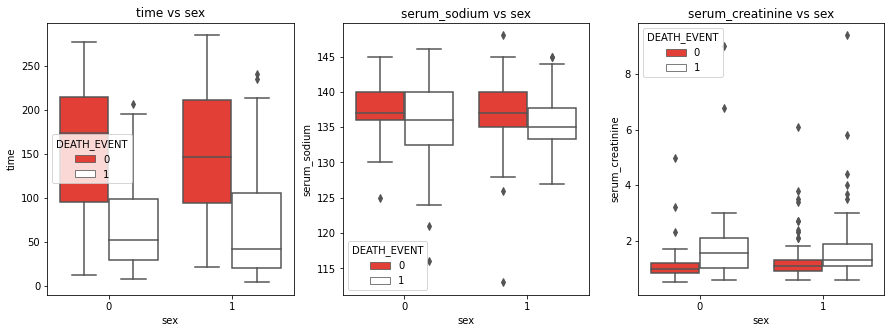

In [25]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'sex',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs sex' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'sex',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs sex' 
    plt.title(title);

- For female(0) population, **age** group **50 - 70** and male(1) population's **age** group **60 - 75** are more prone to heart failure leading to **DEATH_EVENT**.
- **ejaction_fraction** values for female(0) population of **30 - 50** and **20 - 40** for male(1) population leads to cases of **DEATH_EVENT**.
- **serum_sodium** values indicating **DEATH_EVENT** due to heart failure is different for male and female.

#### smoking vs Numerical Features :

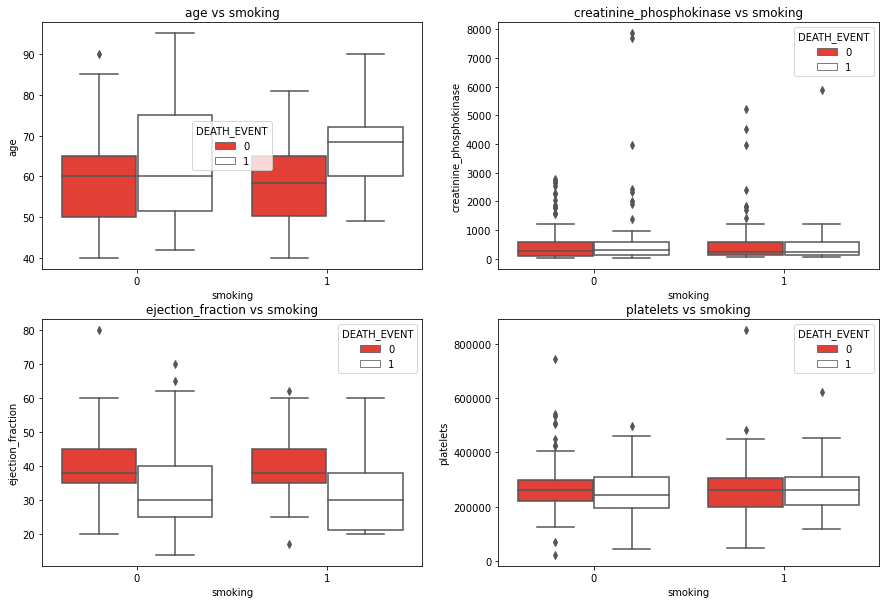

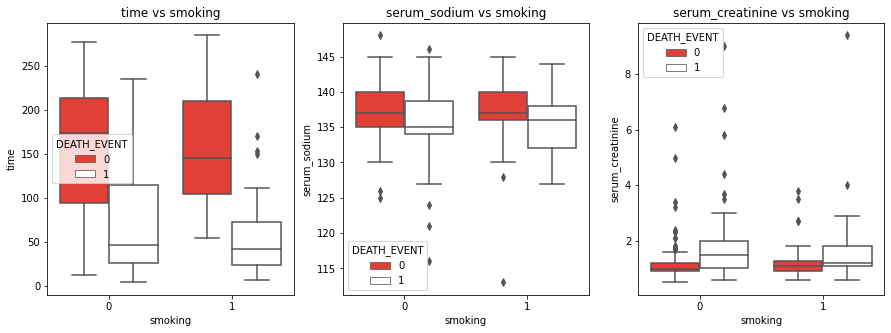

In [26]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = 'smoking',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs smoking' 
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(-1,-4,-1):
    plt.subplot(1,3,-i)
    sns.boxplot(x = 'smoking',y = numerical_features[i],data = data,hue = 'DEATH_EVENT',palette = colors);
    title = numerical_features[i] + ' vs smoking' 
    plt.title(title);

- **age** group of **60 - 70** dominates the cases for **DEATH_EVENT** due to **smoking**. However, range of values ,**50 - 75** , increases for cases of **DEATH_EVENT** that do not **smoke**.
- **Smoking** reduces the range of values for feature **time** to **0 - 75** that someone might face a **DEATH_EVENT**.

### Numerical features vs Numerical features w.r.t Target variable(DEATH_EVENT) :

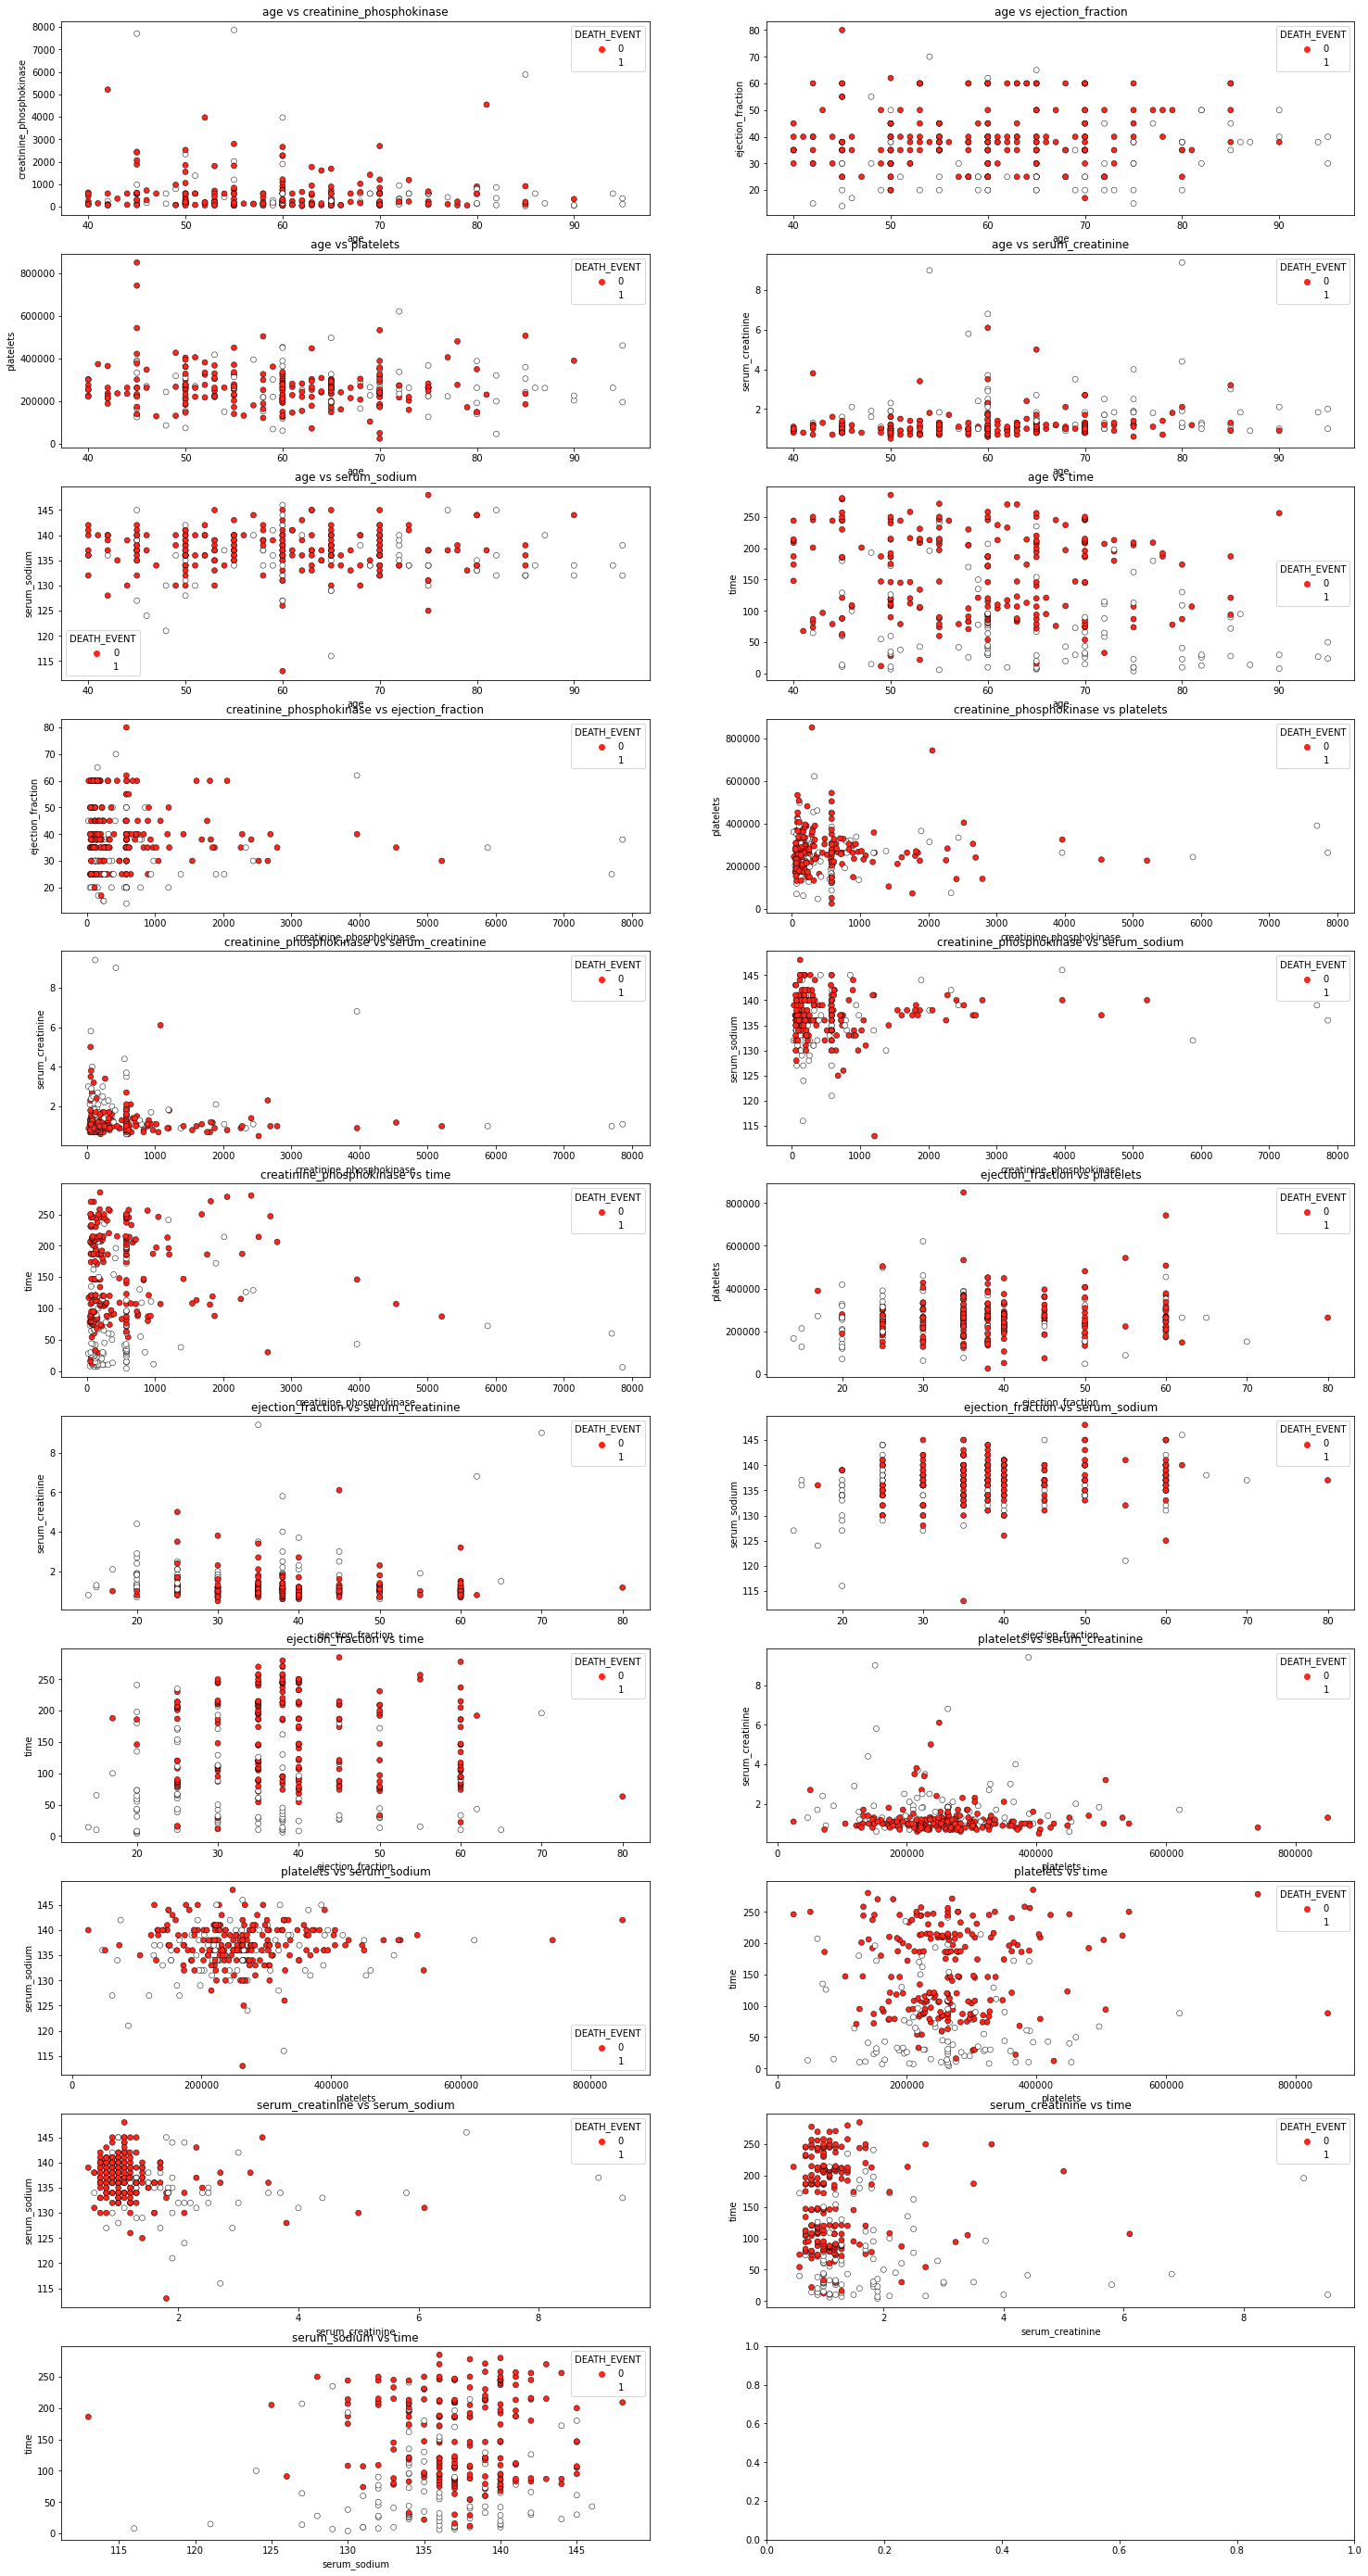

In [27]:
a = 0
fig,ax = plt.subplots(nrows = 11,ncols = 2,figsize = (25,50),squeeze = False)
for i in range(len(numerical_features) - 1):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(11,2,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'DEATH_EVENT',palette = colors,edgecolor = 'black');
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- For **time vs age** plot, **DEATH_EVENT** peaks can be found at **age** values of 50, 60, 70 and 80 for **time** value range between **50 - 100**.
- **creatinine_phosphokinase** values between 0 - 500 are dominant in recording **DEATH_EVENT** irrespective of other features.
- Similarly, **ejaction_fraction** values between **20 - 40** record high number of cases of **DEATH_EVENT**.
- **platelets** range of values between **2x10^5 - 4x10^5** and **time** between **0 - 50** is a strong indicator for **DEATH_EVENT**.
- Another indicator for **DEATH_EVENT** is **serum_creatinine** values from **0 - 2** with **time** values from **0 - 50**.
- **serum_sodium** range of values from **130 - 140** record high number of cases for **DEATH_EVENT**.

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Summary EDA</div></center>

### Order / Values of features for positive cases of heart failure (DEATH_EVENT) :

- **Categorical Features (Order) :**
    
    - **anaemia** : Anaemia = No Anaemia
    - **diabetes** : Diabetes = No Diabetes
    - **high_blood_pressure** : High Blood Pressure > No High Blood Pressure (Needs more data)
    - **sex** : Male > Female
    - **smoking** : No Smoking > Smoking


- **Numerical Features (Range) :**
    
    - **age** : 50 - 70 
    - **creatinine_phosphokinase** : 0 - 500
    - **ejaction_fraction** : 20 - 40
    - **platelets** : 200,000 - 300,000
    - **serum_creatinine** : 1 - 2
    - **serum_sodium** : 130 - 140
    - **time** : 0 - 50


- **According to the data, these order / range of values leads to heart failures.**

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Feature Engineering</div></center>

### Data Scaling :

In [28]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Normalization
df1['age'] = mms.fit_transform(df1[['age']])
df1['creatinine_phosphokinase'] = mms.fit_transform(df1[['creatinine_phosphokinase']])
df1['ejection_fraction'] = mms.fit_transform(df1[['ejection_fraction']])
df1['serum_creatinine'] = mms.fit_transform(df1[['serum_creatinine']])
df1['time'] = mms.fit_transform(df1[['time']])

# Standardization
df1['platelets'] = ss.fit_transform(df1[['platelets']])
df1['serum_sodium'] = ss.fit_transform(df1[['serum_sodium']])
df1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.64,0,0.07,0,0.09,1,0.02,0.16,-1.50,1,0,0.00,1
1,0.27,0,1.00,0,0.36,0,-0.00,0.07,-0.14,1,0,0.01,1
2,0.45,0,0.02,0,0.09,0,-1.04,0.09,-1.73,1,1,0.01,1
3,0.18,1,0.01,0,0.09,0,-0.55,0.16,0.09,1,0,0.01,1
4,0.45,1,0.02,1,0.09,0,0.65,0.25,-4.68,0,0,0.01,1


- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

- We have 2 options for data scaling : 
    
    1) **Normalization** 
    
    2) **Standardization**. 


- As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed but the range of values is huge or small as compared to other features.

### Correlation Matrix :

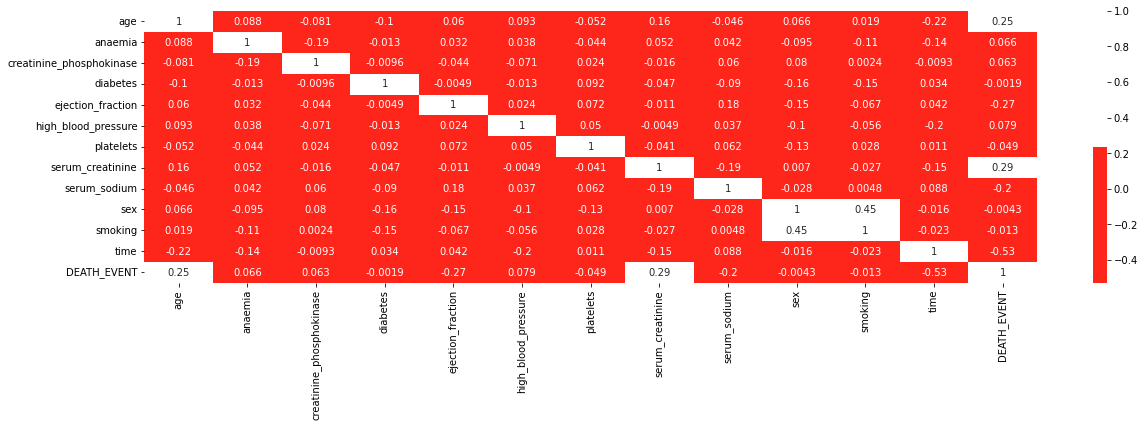

In [29]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

- It is a huge matrix with too many features. We will check the correlation only with respect to **DEATH_EVENT**. 

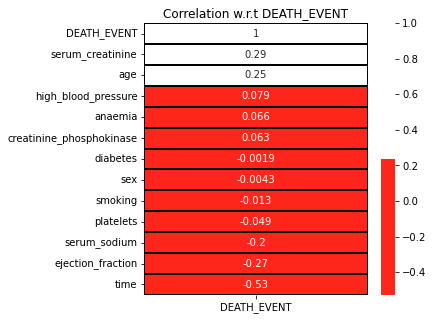

In [30]:
corr = df1.corrwith(df1['DEATH_EVENT']).sort_values(ascending = False).to_frame()
corr.columns = ['DEATH_EVENT']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t DEATH_EVENT');

- Features like **high_blood_pressure**, **anaemia**, **creatinine_phosphokinase**, **diabetes**, **sex**, **smoking**, and **platelets** do not display any kind of correlation with **DEATH_EVENT**.

### Feature Selection for Categorical Features :

In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

#### Mutual Information Test :

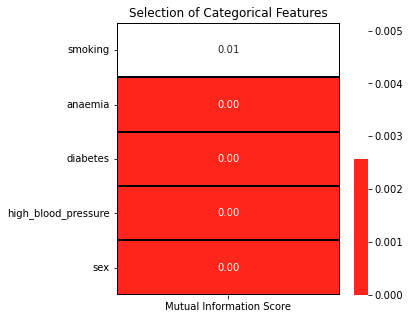

In [32]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Mutual Information Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

#### Chi Squared Test :

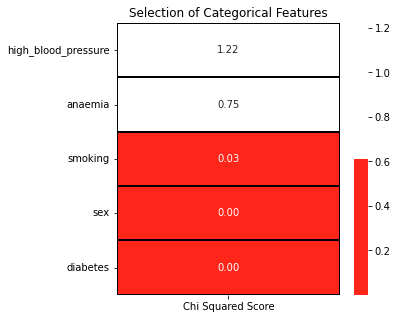

In [33]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

- According to the above tests, none of the features should be selected for modeling.

### Feature Selection for Numerical Features :

#### ANOVA Test :

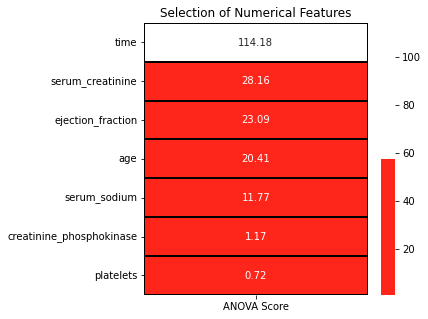

In [34]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

- According to the test, **platelets** and **creatinine_phosphokinase** need to be left out for modeling. 


- We will create 2 models : 1) Based on the statistical test 2) Based on the domain information. 


- According to the statistical tests, we will drop the following features : **anaemia, diabetes, high_blood_pressure, sex, smoking, creatinine_phosphokinase, platelets.**


- According to the Domain Information, we will drop the following features : **sex, platelets.**

In [35]:
df2 = df1.copy(deep = True)

# Dataset for model based on Statistical Test :
df1 = df1.drop(columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'creatinine_phosphokinase', 'platelets'])

# Dataset for model based on Domain Information :
df2 = df2.drop(columns = ['sex','platelets'])

### Data Balancing using SMOTE :

In [36]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

#### Dataset for Model based on Statistical Test :

In [37]:
over = SMOTE()

f1 = df1.iloc[:,:5].values
t1 = df1.iloc[:,5].values
f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({1: 203, 0: 203})

#### Dataset for Model based on Domain Information :

In [38]:
over = SMOTE()

f2 = df2.iloc[:,:10].values
t2 = df2.iloc[:,10].values
f2, t2 = over.fit_resample(f2, t2)
Counter(t2)

Counter({1: 203, 0: 203})

- Here, we balance the data by increasing the minorty group to majority group. In this case we only increase the minority data points as the data is very less.


- Typically, combination of undersampling and oversampling are utilized. 
    - **Undersampling** : Trim down majority data values.
    - **Oversampling** : Minority data values increased to the majority data values.


- Due to the use of synthetic data, we cannot evaluate the models using accuracy. We have duplicated the data, thus using accuracy would be misleading to evaluate the model.


- We will use the confusion matrix, ROC-AUC graph-score for model evaluation. ROC-AUC gives us the relation between True Positive and False Positive rate.

# <center><div style="font-family: Trebuchet MS; background-color: #FE251B; color: #FFFFFF; padding: 12px; line-height: 1;">Modeling</div></center>

- We create 2 versions of 3 machine learning algorithms based on the dataset.

In [55]:
import xgboost
import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from colorama import Fore, Back, Style 
from mlxtend.plotting import plot_confusion_matrix

In [56]:
Features = ['time','ejection_fraction','serum_creatinine']
x = data[Features]
y = data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [57]:
accuracy_list = []

# Logistic Regression

In [58]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [59]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  90.00%


<Figure size 432x288 with 0 Axes>

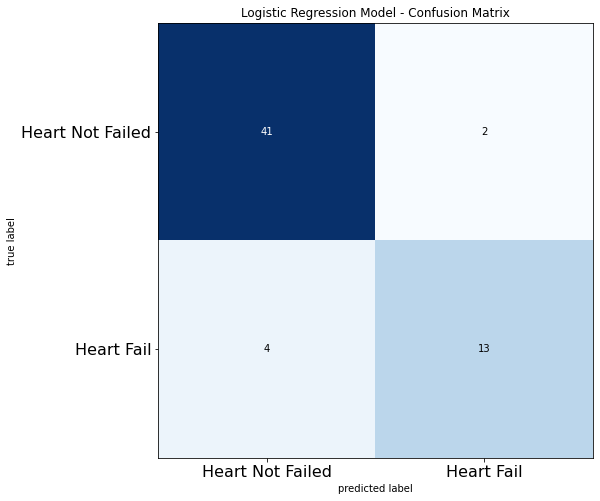

In [60]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# Support Vector


In [61]:
# svc

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [62]:
print(Fore.GREEN + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  90.00%


<Figure size 432x288 with 0 Axes>

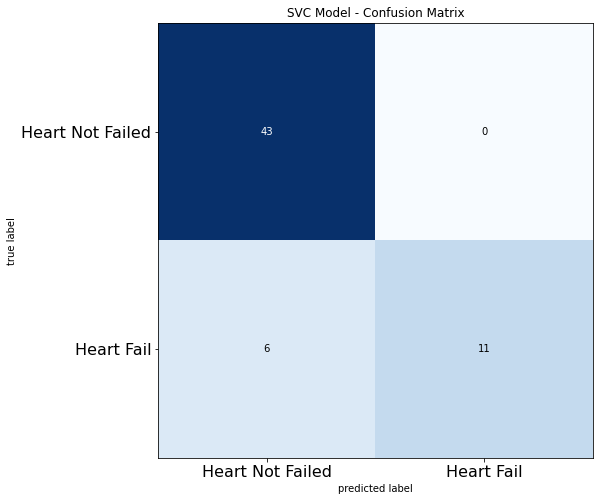

In [63]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# K Neighbors Classifiers

In [64]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [65]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  91.67%


<Figure size 432x288 with 0 Axes>

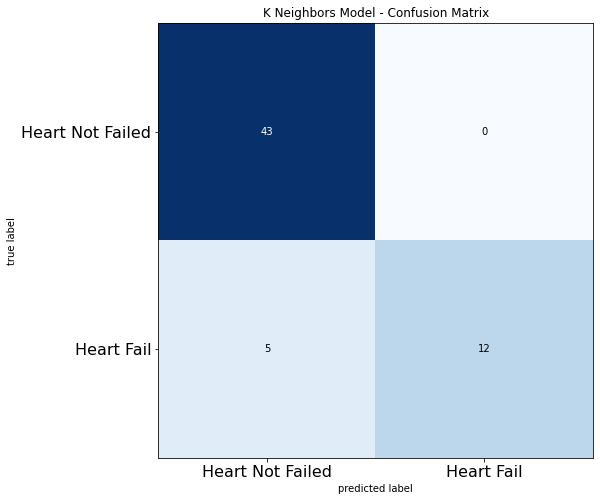

In [66]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# Decision Tree Classifier

In [67]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [68]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  90.00%


<Figure size 432x288 with 0 Axes>

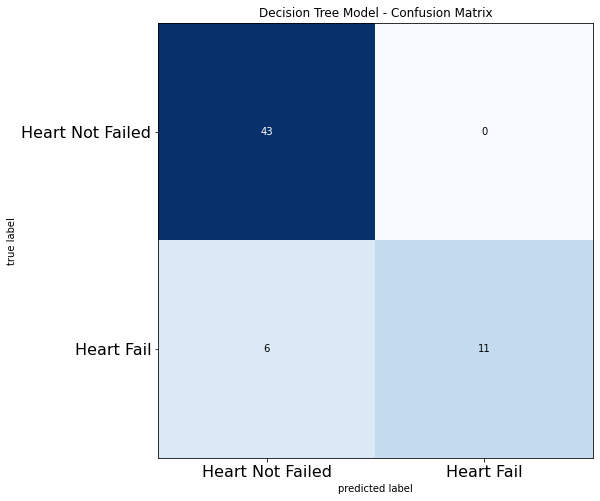

In [70]:
# cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# Random Forest Classifier

In [71]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [73]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  90.00%


<Figure size 432x288 with 0 Axes>

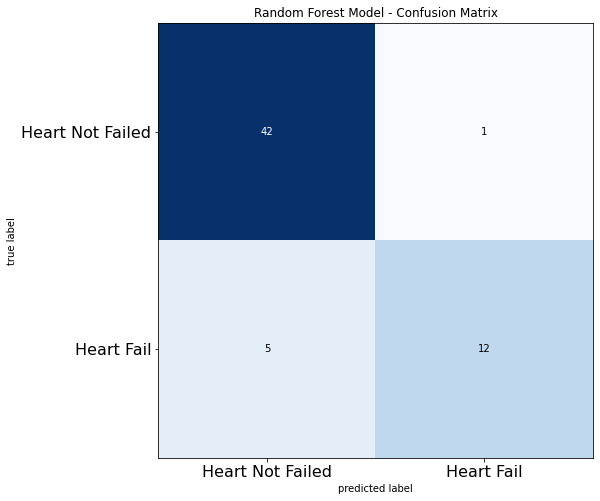

In [74]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# Gradient Boosting Classifier

In [75]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [76]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  93.33%


<Figure size 432x288 with 0 Axes>

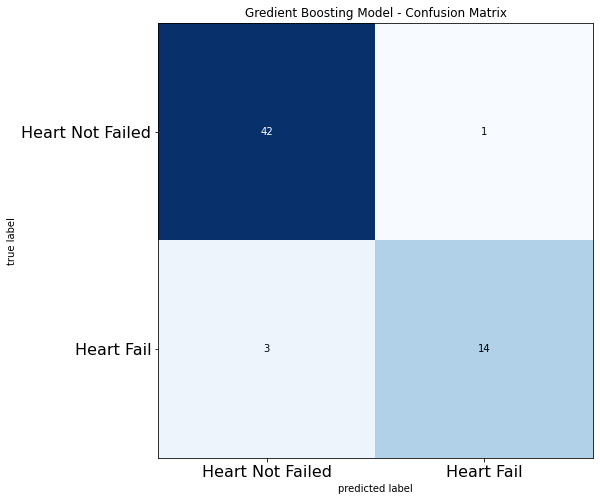

In [77]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# xgbrf classifier

In [78]:
# xgbrf classifier

xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [79]:
print(Fore.GREEN + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  93.33%


<Figure size 432x288 with 0 Axes>

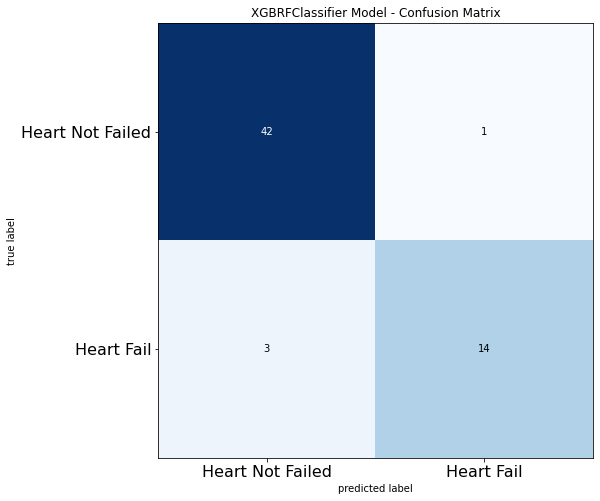

In [80]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

# LGBMClassifier

In [81]:
#  lightgbm 

lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(x_train,y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)

In [82]:
print(Fore.GREEN + "Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* lgb_acc))

Accuracy of LGBMClassifier is :  86.67%


<Figure size 432x288 with 0 Axes>

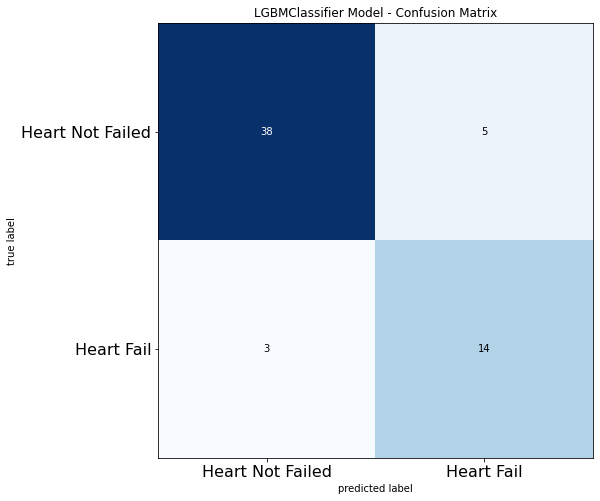

In [83]:
cm = confusion_matrix(y_test, lgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBMClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [84]:
# CatBoostClassifier

cat_clf = CatBoostClassifier()
cat_clf.fit(x_train,y_train)
cat_pred = cat_clf.predict(x_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

Learning rate set to 0.005591
0:	learn: 0.6898089	total: 130ms	remaining: 2m 9s
1:	learn: 0.6853691	total: 131ms	remaining: 1m 5s
2:	learn: 0.6814224	total: 132ms	remaining: 44s
3:	learn: 0.6763787	total: 134ms	remaining: 33.3s
4:	learn: 0.6732323	total: 135ms	remaining: 26.8s
5:	learn: 0.6693704	total: 136ms	remaining: 22.5s
6:	learn: 0.6649135	total: 137ms	remaining: 19.4s
7:	learn: 0.6609337	total: 138ms	remaining: 17.1s
8:	learn: 0.6571249	total: 139ms	remaining: 15.3s
9:	learn: 0.6521269	total: 140ms	remaining: 13.9s
10:	learn: 0.6485155	total: 141ms	remaining: 12.7s
11:	learn: 0.6440567	total: 143ms	remaining: 11.7s
12:	learn: 0.6409554	total: 144ms	remaining: 10.9s
13:	learn: 0.6370791	total: 145ms	remaining: 10.2s
14:	learn: 0.6329117	total: 146ms	remaining: 9.57s
15:	learn: 0.6288988	total: 147ms	remaining: 9.01s
16:	learn: 0.6246823	total: 147ms	remaining: 8.52s
17:	learn: 0.6210250	total: 148ms	remaining: 8.09s
18:	learn: 0.6177116	total: 149ms	remaining: 7.7s
19:	learn: 0.6

246:	learn: 0.3165980	total: 355ms	remaining: 1.08s
247:	learn: 0.3161689	total: 356ms	remaining: 1.08s
248:	learn: 0.3158614	total: 357ms	remaining: 1.07s
249:	learn: 0.3151974	total: 357ms	remaining: 1.07s
250:	learn: 0.3147818	total: 358ms	remaining: 1.07s
251:	learn: 0.3143283	total: 359ms	remaining: 1.07s
252:	learn: 0.3141700	total: 360ms	remaining: 1.06s
253:	learn: 0.3137297	total: 361ms	remaining: 1.06s
254:	learn: 0.3134737	total: 361ms	remaining: 1.05s
255:	learn: 0.3129160	total: 362ms	remaining: 1.05s
256:	learn: 0.3125900	total: 363ms	remaining: 1.05s
257:	learn: 0.3122910	total: 364ms	remaining: 1.05s
258:	learn: 0.3118644	total: 365ms	remaining: 1.04s
259:	learn: 0.3116776	total: 366ms	remaining: 1.04s
260:	learn: 0.3111175	total: 367ms	remaining: 1.04s
261:	learn: 0.3105626	total: 368ms	remaining: 1.04s
262:	learn: 0.3100186	total: 369ms	remaining: 1.03s
263:	learn: 0.3096042	total: 370ms	remaining: 1.03s
264:	learn: 0.3091813	total: 371ms	remaining: 1.03s
265:	learn: 

440:	learn: 0.2557967	total: 527ms	remaining: 668ms
441:	learn: 0.2556496	total: 528ms	remaining: 666ms
442:	learn: 0.2555143	total: 529ms	remaining: 665ms
443:	learn: 0.2553337	total: 529ms	remaining: 663ms
444:	learn: 0.2551125	total: 530ms	remaining: 662ms
445:	learn: 0.2549343	total: 531ms	remaining: 660ms
446:	learn: 0.2545810	total: 532ms	remaining: 659ms
447:	learn: 0.2544083	total: 533ms	remaining: 657ms
448:	learn: 0.2541766	total: 534ms	remaining: 655ms
449:	learn: 0.2537629	total: 535ms	remaining: 654ms
450:	learn: 0.2537044	total: 536ms	remaining: 652ms
451:	learn: 0.2533892	total: 537ms	remaining: 651ms
452:	learn: 0.2531376	total: 538ms	remaining: 649ms
453:	learn: 0.2527400	total: 539ms	remaining: 648ms
454:	learn: 0.2525418	total: 540ms	remaining: 646ms
455:	learn: 0.2524338	total: 540ms	remaining: 645ms
456:	learn: 0.2523683	total: 541ms	remaining: 643ms
457:	learn: 0.2522257	total: 542ms	remaining: 642ms
458:	learn: 0.2518211	total: 543ms	remaining: 640ms
459:	learn: 

632:	learn: 0.2197152	total: 698ms	remaining: 405ms
633:	learn: 0.2196176	total: 699ms	remaining: 404ms
634:	learn: 0.2195596	total: 700ms	remaining: 402ms
635:	learn: 0.2193918	total: 701ms	remaining: 401ms
636:	learn: 0.2190202	total: 702ms	remaining: 400ms
637:	learn: 0.2188899	total: 703ms	remaining: 399ms
638:	learn: 0.2187351	total: 704ms	remaining: 398ms
639:	learn: 0.2186771	total: 705ms	remaining: 396ms
640:	learn: 0.2186094	total: 705ms	remaining: 395ms
641:	learn: 0.2183919	total: 706ms	remaining: 394ms
642:	learn: 0.2181481	total: 707ms	remaining: 393ms
643:	learn: 0.2179622	total: 708ms	remaining: 391ms
644:	learn: 0.2177679	total: 709ms	remaining: 390ms
645:	learn: 0.2175550	total: 710ms	remaining: 389ms
646:	learn: 0.2172414	total: 711ms	remaining: 388ms
647:	learn: 0.2170534	total: 712ms	remaining: 387ms
648:	learn: 0.2169682	total: 713ms	remaining: 385ms
649:	learn: 0.2167602	total: 714ms	remaining: 384ms
650:	learn: 0.2165810	total: 714ms	remaining: 383ms
651:	learn: 

827:	learn: 0.1919132	total: 872ms	remaining: 181ms
828:	learn: 0.1917168	total: 873ms	remaining: 180ms
829:	learn: 0.1915981	total: 873ms	remaining: 179ms
830:	learn: 0.1912739	total: 874ms	remaining: 178ms
831:	learn: 0.1912159	total: 875ms	remaining: 177ms
832:	learn: 0.1909840	total: 876ms	remaining: 176ms
833:	learn: 0.1908361	total: 877ms	remaining: 175ms
834:	learn: 0.1907498	total: 878ms	remaining: 174ms
835:	learn: 0.1907104	total: 879ms	remaining: 172ms
836:	learn: 0.1906485	total: 880ms	remaining: 171ms
837:	learn: 0.1905013	total: 881ms	remaining: 170ms
838:	learn: 0.1903734	total: 882ms	remaining: 169ms
839:	learn: 0.1903177	total: 882ms	remaining: 168ms
840:	learn: 0.1902652	total: 883ms	remaining: 167ms
841:	learn: 0.1901556	total: 885ms	remaining: 166ms
842:	learn: 0.1899236	total: 885ms	remaining: 165ms
843:	learn: 0.1896725	total: 886ms	remaining: 164ms
844:	learn: 0.1894306	total: 887ms	remaining: 163ms
845:	learn: 0.1892784	total: 889ms	remaining: 162ms
846:	learn: 

In [85]:
print(Fore.GREEN + "Accuracy of CatBoostClassifier is : ","{:.2f}%".format(100* cat_acc))

Accuracy of CatBoostClassifier is :  91.67%


<Figure size 432x288 with 0 Axes>

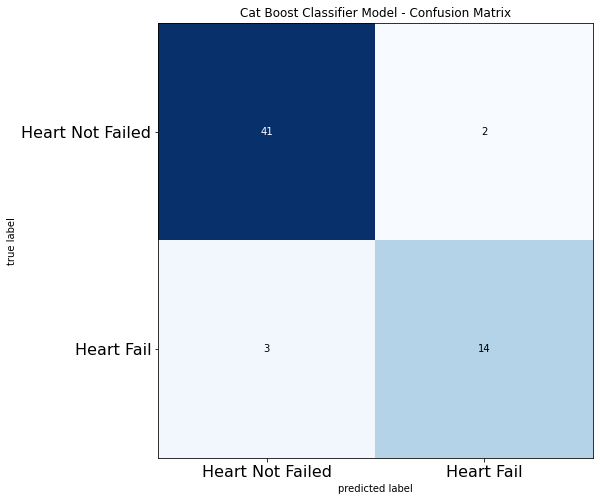

In [86]:
cm = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Cat Boost Classifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [87]:
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster', 'XGBRF','LGBM', 'CatBoostClassifier']

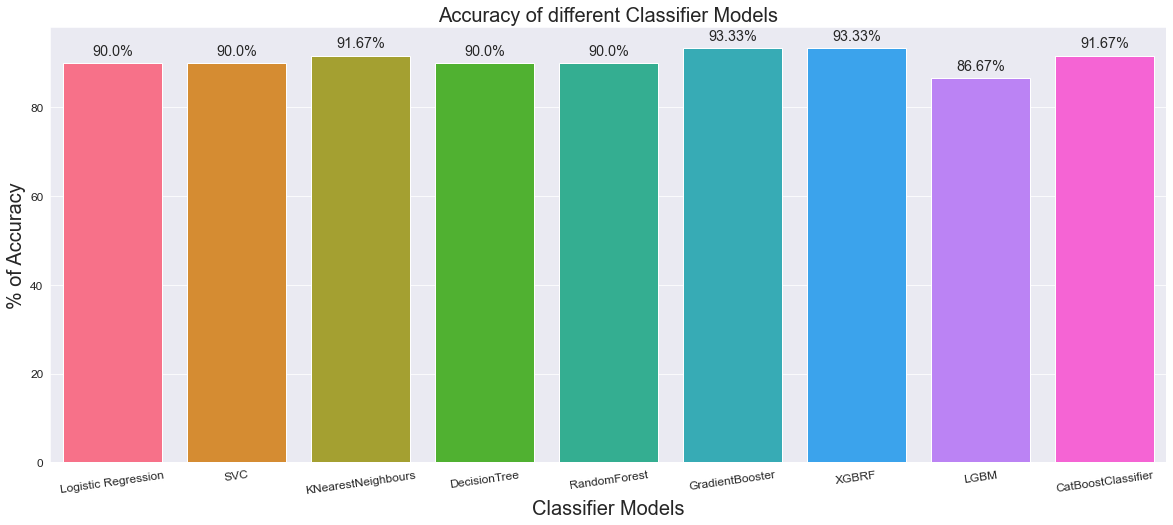

In [88]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()